# 图像特效-高斯滤波

In [1]:
from scipy import signal
import numpy as np
import cv2
import matplotlib.pyplot as plt
from numpy.lib.function_base import histogram

In [2]:
def noise_gaussian(M,N,a = 0,b=1):
    R = a + b * np.random.randn(M,N)
    return R

In [3]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)
gray = cv2.imread('../datas/f2.jpg',0)
rows,cols = gray.shape
noise = noise_gaussian(rows,cols,a=0,b=0.1)
src_noise_gray = gray.astype(np.float32) + noise * 255

src_noise = np.zeros(src.shape,dtype=np.float64)
src_noise[:,:,0] = np.float64(src[:,:,0]) + noise * 255
src_noise[:,:,1] = np.float64(src[:,:,1]) + noise * 255
src_noise[:,:,2] = np.float64(src[:,:,2]) + noise * 255

src_noise[src_noise < 0] = 0
src_noise[src_noise > 255] = 255
src_noise = src_noise.astype(np.uint8)

In [4]:
# 生成低通高斯滤滤波核
def freqfilter_guassian_lp_kernel(M,N,D0):
    u = np.arange(-M//2,M//2)
    v = np.arange(-N//2,N//2)
    [U,V] = np.meshgrid(u,v)
    D = np.sqrt((U - M // 2) ** 2+(V - N // 2) ** 2)
    eps = 1.0e-5
    H = 1.0 - np.exp(-D ** 2 / 2.0 / D0 / D0)
    return H
    

In [13]:
def gaussian_filter(im,D0=10):
    srcf = im.astype('float32') / 255.0
    imfft = np.fft.fft2(srcf)
    imfftshift = np.fft.fftshift(imfft)
    
    rows,cols = src.shape[0],src.shape[1]
    n1 = rows // 2
    n2 = cols // 2
    
    H = freqfilter_guassian_lp_kernel(cols,rows,D0)
    result = imfftshift * H
    result = np.fft.ifftshift(result)
    result = np.fft.ifft2(result)
    dst = np.abs(result)
    return dst

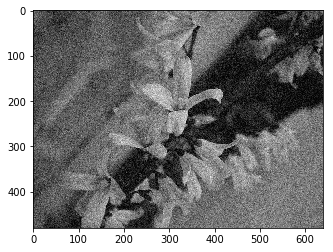

In [21]:
dst = gaussian_filter(src_noise_gray,10)
plt.imshow(dst,'gray')

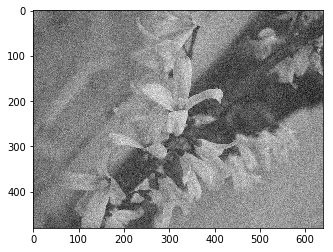

In [20]:
plt.imshow(src_noise_gray,'gray')